# 인공 신경망

In [2]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


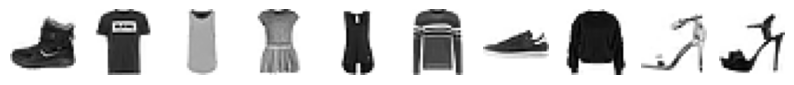

In [5]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([int(train_target[i]) for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [8]:
print(np.unique(test_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [9]:
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)

In [10]:
print(train_scaled.shape)

(60000, 784)


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log_loss',max_iter=5,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.81945


In [12]:
sc=SGDClassifier(loss='log_loss',max_iter=20,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.84375


In [13]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [14]:
from tensorflow import keras

In [15]:
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [16]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape,val_target.shape)

(12000, 784) (12000,)


In [18]:
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# model=keras.Sequential(dense)
model = keras.Sequential([dense])

"""

model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

"""

"\n\nmodel = keras.Sequential([\n    keras.Input(shape=(784,)),\n    keras.layers.Dense(10, activation='softmax')\n])\n\n"

In [20]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7951 - loss: 0.6065
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8405 - loss: 0.4751
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8477 - loss: 0.4510
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.8516 - loss: 0.4380
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.8545 - loss: 0.4295


In [22]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8523 - loss: 0.4351  


[0.4350713789463043, 0.8523333072662354]

## 그냥 하는 실험

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
    # keras.layers.Dense(10)
])

In [24]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8121 - loss: 0.5297
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8590 - loss: 0.3942
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8719 - loss: 0.3552
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8796 - loss: 0.3337
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8861 - loss: 0.3162


In [25]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8815 - loss: 0.3564  


[0.35640648007392883, 0.8815000057220459]

In [26]:
model = keras.Sequential([
    keras.layers.Dense(1000,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax'),
    # keras.layers.Dense(10)
])
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled,train_target,epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8005 - loss: 0.5491
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8485 - loss: 0.4141
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8646 - loss: 0.3731
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8724 - loss: 0.3439
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8821 - loss: 0.3219
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8879 - loss: 0.3049
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8931 - loss: 0.2890
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8961 - loss: 0.2766
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8999 - loss: 0.2672
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9054 - loss: 0.2556


In [27]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.3489


[0.34885868430137634, 0.8777499794960022]